<a href="https://colab.research.google.com/github/Rosari03/Metodos-Numericos/blob/main/Interpolacion_de_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolacion de Lagrange
Este metodo nos permite mapear un conjunto de numeros en un polinomio de la forma :

$$p_n(x)=a_nx^n+a_{n-1}x^{n-1}+...+a_1x+ a_0$$

Una razón de su importancia
es que se aproximan de manera uniforme a las funciones continuas, esto quiere decir que existe polinomio que está tan “cerca” de la función dada como se desee.

In [ ]:
import sympy as sp
from sympy import sympify, lambdify
import numpy as np
import matplotlib.pyplot as plt
import math


# El metodo para encontrar este polinomio
Basicamente tenemos que seguir la siguiente formula

$P_{lagrange}=∑_{i=0}^{n-1} f(x_i)$ $∏ _{j\neq i}\frac{(x-x_i)}{(x_i-x_j)}$

donde nos dara como resultado un polinomio de grado $n-1$

In [ ]:
def lagrange(X:list[float]|np.ndarray,y:list[float]|np.ndarray,x:sp.Symbol):
  """
  La funcion recibe 2 listas, que corresponde a las parejas ordenadas (x,y) sobre los cuales generaremos el polinomio interpolante de Lagrange.
  como resultado retorna un polinomio de grado n-1 representado con Sympy c:

  """
  assert len(X) == len(Y), "Tamaño diferente"
  Px=1
  Lag=0
  for i in range(len(X)):
    for j in range(len(X)):
      if j!=i:
       Px*=(x-X[j])/(X[i]-X[j])
    Lag+=y[i]*Px
    Px=1
  return Lag

In [ ]:
X=[0,.6,.9]
Y=np.log(1+np.array(X))
x=sp.Symbol("x")

In [ ]:
l=sp.expand(lagrange(X,Y,x))

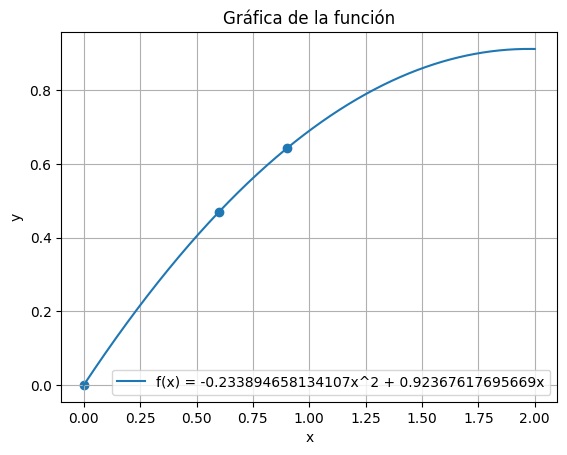

In [ ]:
f_numeric = lambdify(x, l, 'numpy')
x_vals = np.linspace(-0, 2, 1000)
y_vals = f_numeric(x_vals)
plt.plot(x_vals, y_vals, label="f(x) = -0.233894658134107x^2 + 0.92367617695669x")


plt.title("Gráfica de la función")
plt.grid(True)
plt.legend()
plt.scatter(X,Y,label="Puntos")
plt.xlabel("x")
plt.ylabel("y")

plt.show()
